# Estrategia MA_Trader para 2020

In [2]:
from core.trade_service.traders.MA_Trader import MA_Trader
from datetime import datetime

In [3]:
from core.data_service.data_service import Data_Updater

### Update Data

In [3]:
data_srv = Data_Updater(symbol='BTCUSDT', time_interval='1h')

In [5]:
data_srv.update_data()

True

### Run MA_trader Model

In [4]:
model = MA_Trader(mode='sim', 
                  period_long=25, 
                  period_short=14, 
                  panic=-.04,
                  interval_group='1h',
                  interval_source='1h',
                  start_time=datetime.fromisoformat('2021-01-01')
                   )

#Hack para finalizar el primero de enero
model.data_mgr.end_time = datetime.fromisoformat('2021-02-01')
model.data_mgr._set_data()

In [5]:
model.evaluate()

In [6]:
model.score(1,1)

17.191575751842226

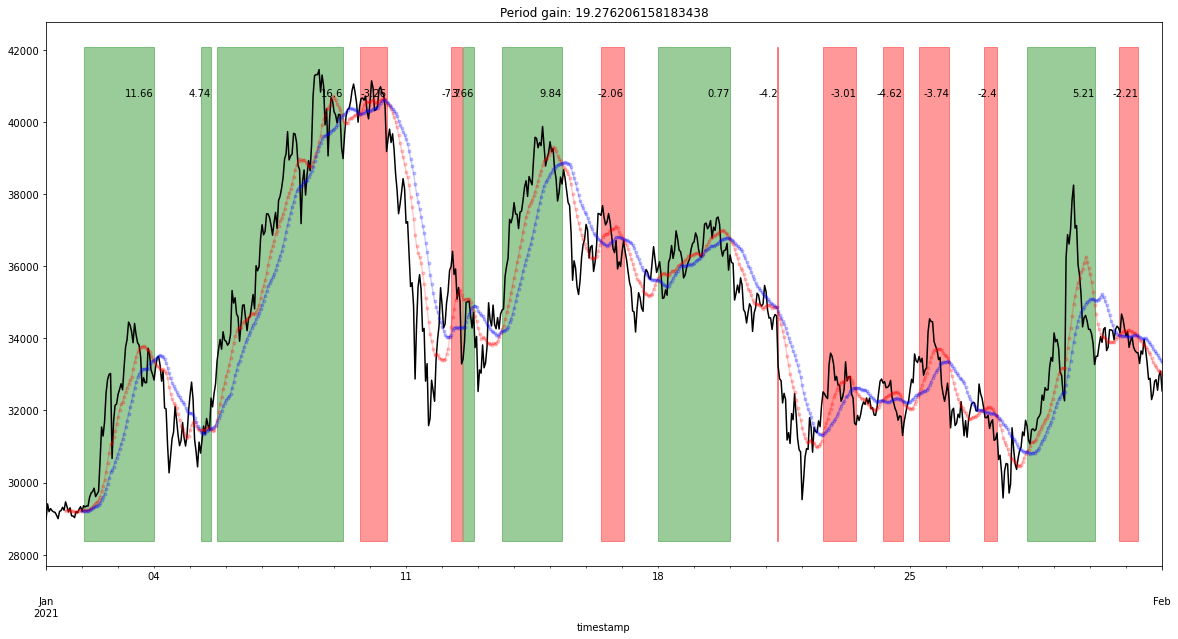

In [6]:
model.plot_lines()

In [7]:
import pandas as pd
from core.trade_service.instruments.scores import gain_simulation

In [8]:
result = pd.DataFrame(model.trade_record).T

In [13]:
gain_simulation(result)

17.191575751842226

In [1]:
from core.trade_service.instruments.channels import KELT

In [8]:
data = model.data_mgr.get_data()

In [15]:
low,mid,hi=KELT(data,20,14,1)

In [16]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Period gain: 19.276206158183438'}, xlabel='timestamp'>

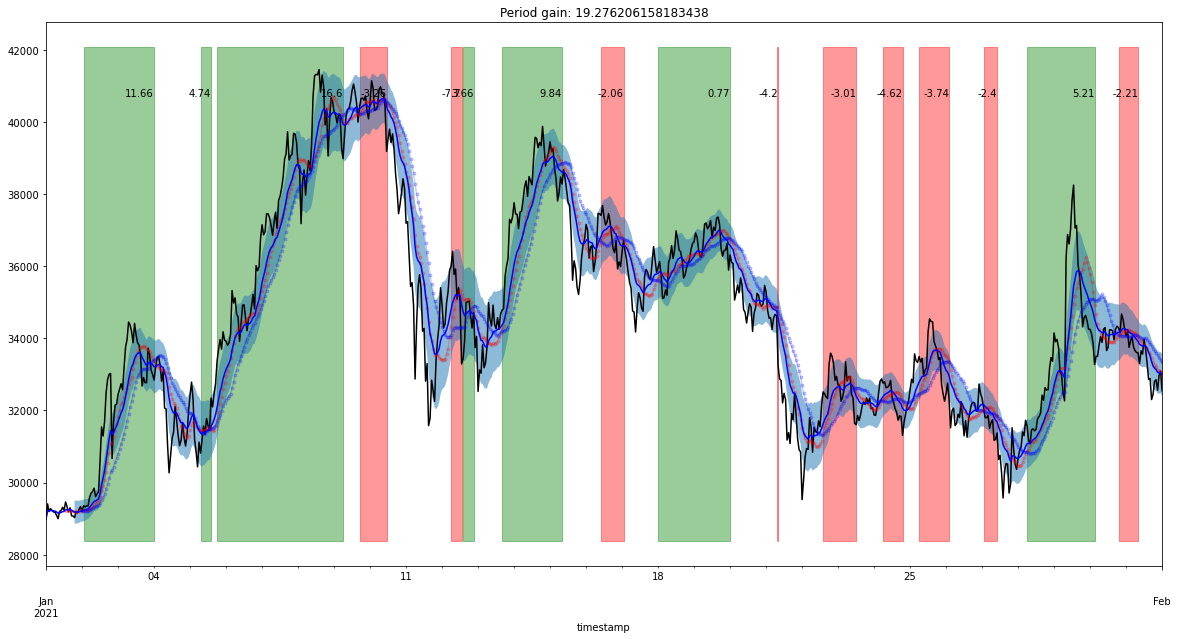

In [50]:

model.plot_lines()
plt.fill_between(data.index, low, hi, alpha=.5)
data.loc[:, 'mid'] = mid
data.mid.plot(color='blue')